<a href="https://colab.research.google.com/github/inventior/cs228-material/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout 2: Supervised learning using Keras/TensorFlow

In this project we will continue the application of neural networks for supervised learning, more precisely for image recognition. This time we will use [Keras](https://keras.io/), an API for implementing neural networks, which uses [TensorFlow](https://www.tensorflow.org/) as it's backbone. You will learn basics of the most common techniques used in image recognition and how to apply them using Keras. As an example we will consider the [Fashion MNIST](http://yann.lecun.com/exdb/mnist/) dataset of images of individual articles of clothing. This dataset is one of the benchmark problems in image recognition. The homework project will be on the CIFAR-10 data set of images.

# Part I: Keras

In the first handout you have learned how to use neural networks for simple task of two-dimensional data classification. You have been introduced to concepts of supervised learning, network layers, activation functions, forward-propagation, backward-propagation, cost function, and others. In your final project, you were asked to implement a fully-connected deep neural networks and to classify some simple non-linear data. Unfortunately, the simple network architecture that was used is not so effective in more realistic classification problems. More sophisticated layers, as well as cost and activation functions have to be introduced. There is a good news though: nowadays you do not need to write your code from scratch and can use one of the open source environments containing most of the needed tools. One of the most popular such environments is Keras, typically with Tensorflow as backbone. (Keras is a set of extra functionality that calls the Tensorflow routines.) We highlight one more time that Keras and Tensorflow are just tools for implementing neural networks and to effectively employ them you will need to learn some extra aspects of the neural networks in addition to material from the handout 1. 

First of all, let us import [TensorFlow](https://www.tensorflow.org/) and its neural network API [Keras](https://keras.io/). At the same time we will also import other libraries used by us later:

It must be said that both [Keras](https://keras.io/) and [TensorFlow](https://www.tensorflow.org/) have their own database of tutorials. They are quite complete and well written. For our project the ambition is to narrow down to a subset of layers and functions and quite quickly progress to the calculations. The tutorials can be used for more indepth coverage.    

It is always easier to learn on a concrete example. There are quite a few databases available for direct import from Keras or TensorFlow. Most of them are well known databases of images used as benchmark sets in classification problems. We chose to first present a dataset called [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). It contains 70,000 28 by 28 uint8 grayscale images of individual articles of clothing classified in 10 categories.

## The Adam Optimization Algorithm

The training is usually done through Adam optimization algorithm. The name Adam is derived from adaptive moment estimation and it is an extension of the stochastic gradient descent that you saw in the previous handout. Adam has proven to be very effective in practice and that is why nowadays it is widely used in classification problems.  Without going into any details Adam assigns individual learning rates to distinct variational parameters (weights, thresholds) and optimizes the training: it automatically decreases the learning rates of noisy variational parameters, i.e. parameters with large derivative variations. For more details take a look at the original research [paper](https://arxiv.org/pdf/1412.6980.pdf).

Adam is surprisingly robust to the choice of hyper parameters. The parameters set by default are found to work extremely well in wide range of applications. The only parameter one may consider to optimize is the global learning rate $\alpha$. Here $\alpha$ is the learning rate assigned to each parameter before normalization by a "variance"-dependent factor that depends on hyper parameters $\beta_1$, $\beta_2$, and $\epsilon$. 

To use Adam optimizer within Keras we set argument <code>optimizer</code> of method <code>compile</code> to <code>tf.train.AdamOptimizer()</code>, or <code>optimizer='adam'</code> The default hyper parameters of <code>AdamOptimizer()</code> are learning_rate=0.001, beta1=0.9, beta2=0.999, and epsilon=1e-08. As was mentioned before, in practice almost always it is just enough to vary the hyper parameter learning_rate or even leave it unchanged. 

## Cross-Entropy and Soft-Max

Even though the squared error loss function is probably the easiest choice for the loss function and it has been shown to be quite effective for simple classification tasks, it is actually not so efficient for classifying more complicated datasets. A more effective way to do the training is to employ the so-called [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy) cost function in combination with the so-called [softmax activations](https://en.wikipedia.org/wiki/Softmax_function) in the output layer. The softmax outputs are defined as follows**
$$h^{(l)}_i = g(\,\boldsymbol{a}^{(l)})= \frac{e^{\, \lambda a^{(l)}_i}}{\sum_{i=1}^{M}e^{\, \lambda a^{(l)}_i}},$$

where we use the same notations as in the first handout  $a^{(l)}_i = \sum_{j} w^{(l)}_{ij} h^{(l-1)}_j - b^{(l)}_i$. Here $M$ is number of neurons in layer $l$. Usually, the softmax outputs are employed only in the output layer: $l = L$ and $h^{(l)}_i = O_i$. There are two things to notice here. (1) In the limit $\lambda \rightarrow \infty$ the softmax outputs $h^{(l)}_i$ are all zero except the output corresponding to maximum value from inputs $a^{(l)}_i$. Usually one takes $\lambda = 1$ and the resulting outputs correspond to a smoothened version of the maximum condition, that is how this function received its name <b>softmax</b>. (2) The outputs happen to always sum up to $1$ and therefore each output can be interpreted as a probability of the input data to fall into corresponding category. Thus, the usage of softmax activations in the output layer is actually a quite natural choice and they provide us at least some intuition on the interpretation of the network outputs. 

The softmax activations are then processed by the cross-entropy cost function. It is defined as follows


$$H = - \sum_{i \mu} y^{\mu}_i \, \text{log} \, O^{\mu}_i,$$ 

where $y^{\mu}_i$ are target values of the labels: for a particular choice of $\mu$ the targets $y^{\mu}_i$ are all zeros except a single $i$ corresponding to the correct label category for which $y^{\mu}_i = 1$. Clearly, this cost function has a global minimum (of 0) at $O^{\mu}_i = y^{\mu}_i$ (verify this yourself using the fact that $O^{\mu}_i$ sum to 1 for every $\mu$). Therefore we may train our network by minimizing $H$. This is done by forwardpropagation and backpropagation: the principle is the same as in the first handout, however, some derivatives have to be modified to be in agreement with the newly defined output layer. Luckily, this is automatically taken care of in Keras/TensorFlow and you do not need to explicitly program anything. 

The cross-entropy cost function used in combination with softmax activations has a big advantage over the squared error loss function. It does not suffer from the vanishing gradient problem when performing back-propagation on it. [The vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) is difficulty to train the weights in front layers of the deep network. In short, this problem arises as a result of backpropagation: the update rule for weights in front layers is calculated through a chain rule, that results in vanishing or explosion of the training updates of the weights in front (far most from the output) layers. This is actually one of the reasons why for improving performance we need to introduce new network architectures rather than simply add more and more fully-connected layers to the network. 




To sum up, it is quite a common practice in image recognition to end up a neural network with <code>Dense(M, activation="softmax")</code> and train it by using <code>loss='categorical_crossentropy'</code> or <code>loss='sparse_categorical_crossentropy'</code>. The difference between those two loss functions is just in enconding of the targets: if the output labels are given by the numbers $0, ..., M$ we should use <code>'sparse_categorical_crossentropy'</code>, if they are in format of unit vectors, for example $[1 0 0 0 0 ... 0]$, $[0 1 0 0 0 ... 0]$ and so on, then we have to use <code>'categorical_crossentropy'</code>.


## Rectified linear units (ReLU) activation function

In the first handout you have encountered $\text{tanh}()$-based activations. Here we introduce you to new more effective activations, the activation functions based on rectified linear units (ReLU). They are defined as follows

$$h^{(l)}_i = g(\,\boldsymbol{a}^{(l)})= \text{max}(0, \, a_i^{(l)}).$$

A ReLU activation has two main advantages over the $\text{tahn}()$ activations introduced before. To begin with, neural networks with ReLU activations become effectively sparsely connected because many of the hidden neurons are exactly zero (neurons with $a_i < 0$). It is believed from practice that sparsely connected networks perform much better over densely connected networks in classification problems. Another important property is that the ReLU activation functions do not have vanishing derivative at large inputs $a_i$ (in contrast to $\text{tanh}()$-based activations). However, it can happen that the weights will increase unboundly. The way to overcome this problem is to use Regularization techniques to be discussed later. 

To implement ReLU activations in Keras we simply set argument <code>activation</code> to value <code>"relu"</code>. Similarly, we may use <code>activation="sigmoid"</code> to switch to sigmoid activations. [The sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) is very similar to $\text{tanh}(x)$ but it takes values between 0 and 1 (rather than between -1 and 1 in case of $\text{tanh}(x)$).

## Convolutional layers

As it has been mentioned, the fully-connected deep networks are not as effective for solving more complicated classification problems as we would like them to be. They have limitation on the performance and they can not be simply improved by adding more and more hidden layers to the network. We have to change architecture of the layers for improving the performance beyond the limit of fully-connected deep network. 

This can be done with so-called [convolutional layers](https://en.wikipedia.org/wiki/Convolutional_neural_network#Convolutional) commonly followed by [max pooling layers](https://en.wikipedia.org/wiki/Convolutional_neural_network#Pooling_layer).  These layers have quite intuitive structures and are briefly described in the following:  The neuron layers in a convolutional network are actually given as planar arrays and then connected between each other by using so-called filters. The filter can be visualized as mapping of small input clusters (called local receptive fields) to output neurons, Fig. 1. The neurons are schematically visualized by squares. <img src="files/Figures/Conv_layer.png"> Analogously to fully-connected layers, the layer to layer mapping in convolutional networks is done by the usual rule $a^{(l)}_i = \sum_{j} w^{(l)}_{ij} h^{(l-1)}_j - b^{(l)}_i$ but the sum only involves neurons $j$ from the local receptive fields of neuron $i$. Moreover, the weight $w$ and threshold $b$ of a filter is the same for all clusters sweeping through the input layer. Thus, one filter can pick up generic features in the input image no matter where theose features are located. Also, a number of variational parameters is small and therefore the training is numerically efficient.  Those are ones of the biggest advantages of convolutional networks. 

There are a few parameters that are present in a convolutional layer and we go through them one by one. First of all, there is size of the receptive field that is used for maps. In Fig. 1 it is 2 by 2 but any size could be chosen. Also, there is so-called stride, the unit shift of the receptive field as we sweep through the input layer. For example, in Fig. 2a the stride is 3 in $x$ and 3 in $y$ directions. To not reduce the dimensionality of the output (Layer 2) in respect to the input (Layer 1) it is a common practice to use so-called paddings: we simply add a few zero rows and columns to the input layer. In Fig. 2b the padding is 1. Finally, one may use multiple number of filters on the same input layer (that could also consist of multiple planar arrays) at once, Fig. 2c. <img src="files/Figures/Conv_Parameters2.png">. 

It is a common practice to follow each convolutional layer by a so-called max pooling layer. For this layer the concepts of local receptive field, stride, and padding also apply (analogously to the convolution layers). However, the mapping is done differently: we just look for a maximum element in the corresponding local receptive field, Fig.3. <img src="files/Figures/Max_pooling.png">


The way to implement this within Keras is to use [Conv2D](https://keras.io/layers/convolutional/) and [MaxPooling2D](https://keras.io/layers/pooling/) objects. The syntax has the following structure:

Conv2D:
<code>keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', activation=None)</code>,
where <code>filters</code> is the number of output convolution layers ( = 3 in Fig. 2c), <code>kernel_size</code> specifies the local receptive field size (=[2, 2] in Figs. 1 and 2), <code>strides</code> denotes the strides, <code>padding</code> indicates that there are no zero paddings ('valid') or there are zero paddings to preserve size of the input ('same'), <code>activation</code> specifies activation functions. There are also other arguments that one may specify in <code>Conv2D</code>, the full list of them is [here](https://keras.io/layers/convolutional/).

MaxPooling2D:
<code>keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')</code>, where <code>pool_size</code> denotes the size of local receptive field, <code>strides</code> and <code>padding</code> are the same as for Conv2D. 


## Batch Normalization

It has been shown to be quite effective to normalize outputs in every (or some) hidden layers. The normalization is done by $h^{(l)}_j \leftarrow (h^{(l)}_j  - \mu_{l})/(\sigma_l^2 + \epsilon)$ where $\mu_{l}$ and $\sigma_l$ are mean and standard deviation of the outputs $h^{(l)}_j$ over one mini batch. The parameter $\epsilon$ is added for avoiding divergences. It is [often found](https://arxiv.org/abs/1805.11604) that these layers speed up the training by smoothening the landscape of the cost function, i.e. they make data nicer to process. 

These layers can be implemented by using [BatchNormalization](https://keras.io/layers/normalization/). 

## Overfitting: Early Stopping 

The overfitting problem has been already introduced to you in the first handout. One way to deal with it is to create a so-called validation set, a set that will be used for estimating performance of the network in middle of the training. The easiest and quite effective way to reduce overfitting is to stop the training at the right moment (cf. [Early Stopping](https://en.wikipedia.org/wiki/Early_stopping)). This can be implemented within Keras by using so-called [CallBacks](http://tflearn.org/getting_started/#training-callbacks), a set of tools that one can access in the middle of training. To be precise we will be using a class <code>keras.callbacks.EarlyStopping</code> in combination with the <code>validation_split</code> argument of the method <code>fit</code>. 


From [this page](https://www.tensorflow.org/api_docs/python/tf/keras/models/Model) the <code>validation_split</code> argument is defined as follows: <blockquote><code>validation_split</code>: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.</blockquote> It is just a transformation of some fraction of the training dataset into a validation set. Very convenient tool. One may also explicitly specify the validation set to  be used in <code>fit</code> method by exploiting <code>validation_data</code> argument: <blockquote><code>validation_data</code>: Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. validation_data will override validation_split. validation_data could be: - tuple (x_val, y_val) of Numpy arrays or tensors - tuple (x_val, y_val, val_sample_weights) of Numpy arrays - dataset or a dataset iterator.</blockquote>

The <code>EarlyStopping</code> class then automatically calculates the loss function estimated on the validation dataset and allows one to perform early stopping if specified conditions are met. The <code>EarlyStopping</code> class has the following main arguments: <blockquote><code>my_callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=0)                              
</code></blockquote> where <code>monitor</code> specifies which quantity is to be monitored and used for early stopping (in our case it is the validation loss function), <code>min_delta</code> is improvement threshold, i.e even if the performance is worse but does not exceed the threshold then it is neglected by the early stopping algorithm, and <code>patience</code> corresponds to the number of epochs before stopping once your loss stops improving. <code>Patience</code> is effective for dealing with noise in the calculated loss function, that is especially large if the batch size is small. For other  more advanced arguments type <code>help(keras.callbacks.EarlyStopping)</code>.   

Finally, you have to include the list with all callbacks, <code>callbacks = [my_callback]</code>, to the <code>fit</code> method as an argument.  
           

## Overfitting: Droupout

To reduce overfitting one may also think of averaging outputs of several trained networks with different architectures. This will most likely be effective but very costly procedure. There is a standard way to go for acheiving something similar. We may introduce so-called [dropout layers](https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout) to our network. These layers select at random with probability $p$ a portion of neurons that will be left out from the training iteration (most commonly for each weight update cycle) and survived neurons are rescaled with a factor $p^{-1}$, Fig. 5. <img src="files/Figures/Drop_out.png"> For validating and testing, all neurons are brought back. In this way the network becomes effectively very sparse and covers different architectures. This is believed to have a positive effect on the results.  

To implement the dropout layers one may use the following syntax:

[Dropout](https://keras.io/layers/core/): keras.layers.Dropout(rate), where rate denotes the portion of input neurons to be dropped out randomly.

## Overfitting: L1 and L2 Regularization

Large weights in networks is a sign of overfitting: small changes in input layer will cause large changes in output. Therefore, to prevent large weights from occurring it is a common practice to add an extra term to the cost function that will penalize for weights being too large. There are two common ways for choosing "penalizing" terms, namely so-called [L1 and L2 Regularizations](https://en.wikipedia.org/wiki/Convolutional_neural_network#Weight%20decay)

L1 regularization (less commonly used) adds a term 

$$ \Delta H = \lambda_1 \sum_{ij} |w_{ij}|$$

and L2 regularization (more commonly used) adds a term 

$$ \Delta H = \lambda_2 \sum_{ij} (w_{ij})^2$$

Within TensorFlow [the regularizers](https://keras.io/regularizers/) can be included by adding the following arguments to the layer objects: <code>kernel_regularizer=regularizers.l2(0.01)</code> and <code>kernel_regularizer=regularizers.l1(0.01)</code>, where $\lambda_1 = \lambda_2 = 0.01$ were used as an example.

Note that the regularization penalties have to be indicated to each layer separately. 

## Part II: Project 

The assignement for project 2 will be to construct and train a convolutational network (CNN) to classify the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). This data set contains a training set of 50000 images and a test set of 5000 images. The images are 32x32 pixel RBG color, labeled in 10 classes. They are quite a bit more challenging to learn than the MNIST data set that was discussed in the introduction. If you can achive an 80% accuracy on the test data it's good.  



A typical architecture for image recognition starts with one or more convolutional layers followed by one or more fully connected layers.  

<font color="red"> Assignment: </font> <b>Construct and train a CNN that can classify the CIFAR-10 data set with at least 65% accuracy on the test data. By using different architectures and hyperparameters try to get the accuracy higher, can you reach 80%? </b> (Might be hard without a GPU for testing.) <b> In the examination of this project you should be able to explain the basic operation of your CNN, e.g. how many weights and biases each layer has.</b>

$\bullet$ The first convolutional layer (as first hidden layer of the network) should have an argument <code>input_shape=(32,32,3)</code> corresponding to the resolution and color channels of the input. Use a fully connected <code>Dense</code> output layer with 10 neurons and <code>activation='softmax'</code>. In front of a dense layer you need to flatten (matrix$\rightarrow$vector) the input: <code>model.add(Flatten())</code>
    
$\bullet$ use a 0.1 validation split of the training data and Early stopping callback as described above 

$\bullet$ use Adam optimizer and <code>loss='sparse_categorical_crossentropy'</code>

$\bullet$ use <code>activation='relu'</code> or try <code>activation='elu'</code> using L2 regularization as described above, but experiment with the $\lambda$ parameter 

$\bullet$ try with or without <code>BatchNormalization()</code> after each layer

$\bullet$ try dropout layers

$\bullet$ for the conv layers it is nice to use <code>padding='same'</code> to keep the same height and width between input and output 

$\bullet$ try maxpooling, e.g. <code>pool_size=(2, 2)</code> reduces hight and weight to half 

$\bullet$ use <code>model.summary()</code> to get an overview of the dimensions and the size in terms of total number of parameters. (Note that the number of parameters does not directly give the Epoch time, the architecture also plays in.)

For an interesting discussion about convolutional networks have a look [at this](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html) (And if you want to get really fancy, try to recreate some of those figures using your trained network.)

Below is some useful code for setting up the data and analyzing the results: 

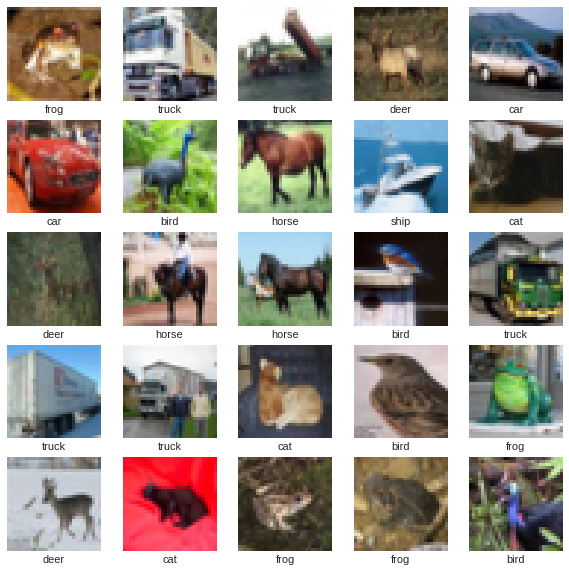

In [0]:
# TensorFlow and tf.keras use it to import mnist data 
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


#Data set
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_labels=train_labels.reshape(50000,)
test_labels=test_labels.reshape(10000,)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#Some examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])


In [0]:
#how many of each class
lab=list(train_labels)
[print(lab.count(i),classes[i]) for i in range(10)];

5000 plane
5000 car
5000 bird
5000 cat
5000 deer
5000 dog
5000 frog
5000 horse
5000 ship
5000 truck


In [0]:
#rescale the images, such that each channel is in the range [-1,1] instead of 0 to 255
#One can try rescaling it differently, for example in range[0,1] as was done for Fashion-MNIST above
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images=2*train_images-1.0
test_images=2*test_images-1.0
#(Note that this means you have to rescale back to positive numbers to plot the images later)

In [0]:
#Import the Keras layers etc
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization
from keras.callbacks import Callback
from keras import regularizers

In [0]:
### Construct network
model = Sequential()


model.add(Conv2D(128, kernel_size=(2,2), activation='relu', input_shape=(32, 32, 3)))



#model.add(Dropout(0.2))

#model.add(Conv2D(128, kernel_size=3, activation="relu"))

model.add(BatchNormalization())

#model.add(Flatten(input_shape=(32, 32, 3)))

model.add(Dense(128, activation="relu", 
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dropout(0.2))

model.add(BatchNormalization())

#Output layer
model.add(Dense(10, activation="softmax"))

#model.add(Dense(10, activation="softmax", input_shape=(32, 32, 3)))

model.summary()

# Compile network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              learning_rate=0.001,
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 31, 31, 128)       1664      
_________________________________________________________________
batch_normalization_25 (Batc (None, 31, 31, 128)       512       
_________________________________________________________________
dense_32 (Dense)             (None, 31, 31, 128)       16512     
_________________________________________________________________
dropout_13 (Dropout)         (None, 31, 31, 128)       0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 31, 31, 128)       512       
_________________________________________________________________
dense_33 (Dense)             (None, 31, 31, 10)        1290      
Total params: 20,490
Trainable params: 19,978
Non-trainable params: 512
_________________________________________________________________


In [0]:

# Define callback
my_callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              verbose=1,
                              patience=0)

model.fit(train_images, train_labels, epochs = 10, validation_split=0.15, callbacks = [my_callback])

# test 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

ValueError: ignored

In [0]:

#to plot examples
predictions = model.predict(test_images)

ValueError: ignored

In [0]:
#These functions:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

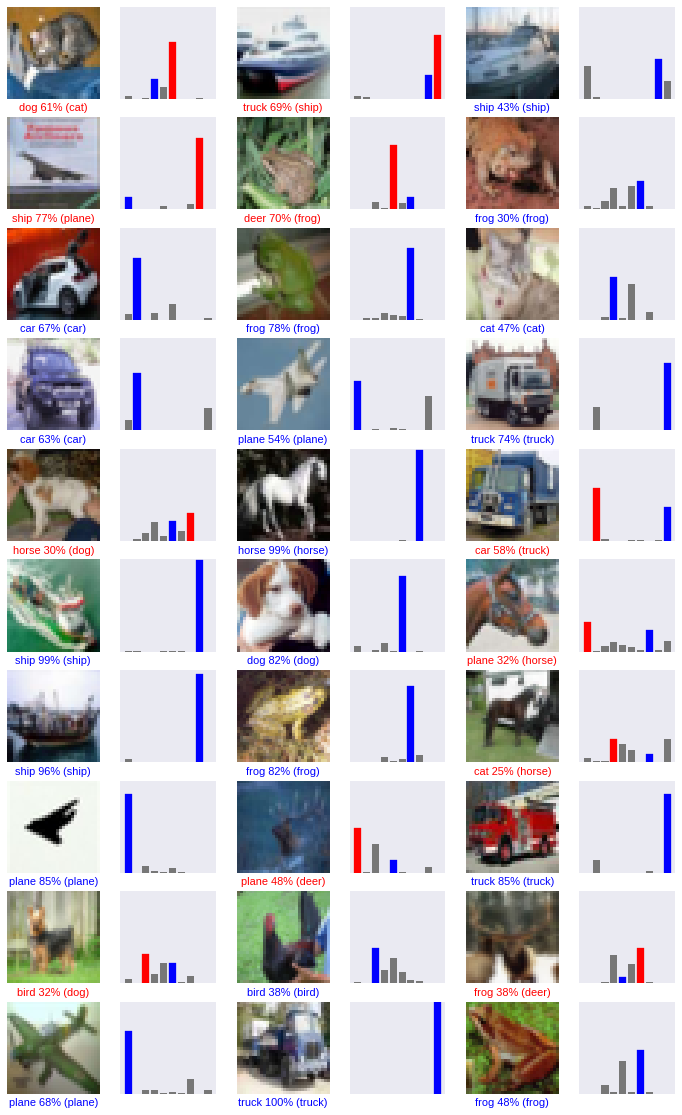

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red 
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images/2+.5)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

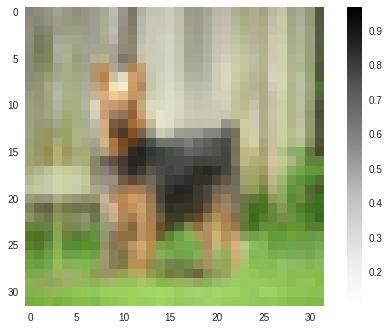

[0.04503846 0.00195789 0.3211406  0.10279009 0.22485538 0.21719098
 0.01135537 0.0748319  0.0004458  0.00039348]
Predicted to be:
bird
Actually is:
dog


In [0]:
# Extra challenge. Can your network get this image of a dog? 

pic_index = 24;

# plot the test picture
plt.figure()
plt.imshow(test_images[pic_index]/2+.5)
plt.colorbar()
plt.grid(False)
plt.show()

print(predictions[pic_index])
np.argmax(predictions[pic_index])
print("Predicted to be:")
print(classes[np.argmax(predictions[pic_index])])
print("Actually is:")
print(classes[test_labels[pic_index]])